### Problemas Primer Parcial

In [1]:
using PyPlot

#### Problema 1

Se sabe que el aire frío se siente mucha más frío cuando hace viento, que lo que indica el termómetro; eso se debe al "efecto frigorífico" del viento, el cuál está asociado al aumento en el coeficiente de transferencia de calor por convección al aumentar la velocidad del aire. La temperatura equivale por enfriamiento de viento, en °F, se determina con la ecuación: $$T_{equiv}=91.4-(91.4-T_{ambiente})\times0.475-0.0203V+0.304\sqrt{V}$$
donde $V$ es la velocidad del viento, en mi/h, y $T_{ambiente}$ la temperatura del aire ambiente, en °F. Se supone que el aire ambiente es inmóvil cuando los vientos son ligeros, hasta 4 mi/h. La constante 91.4 °F en esta ecuación es la temperatura promedio de la piel de una persona en reposo, en un ambiente confortable. La temperatura equivalente con aire a $T_{ambiente}$, en movimiento a la velocidad $V$, se sentirá como si el aire estuviera a la temperatura $T_{equiv}$.

Aplique los factores de conversión adecuados para obtener una ecuación equivalente en unidades SI, donde $V$ sea la velocidad del viento, en km/h, y $T_{ambiente}$ sea la temperatura del aire ambiente en °C. Gráfique las temperatura equivalente por enfriamiento de viento, en °F y °C, en función de la velocidad del viento, entre los límites de 4 a 40 mi/h y sus correspondientes km/h, para las temperaturas ambiente de 20, 40 y 60 °F. Describa los resultados.

In [2]:
Temperaturas = [20, 40, 60] #°F
Velocidades = collect(4:40) # mi/h

37-element Vector{Int64}:
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
 14
 15
 16
  ⋮
 29
 30
 31
 32
 33
 34
 35
 36
 37
 38
 39
 40

Conversion de temperatura y velocidades

In [3]:
function F_to_C(F)
    C = (F - 32)*5/9
    return C
end

function mi_to_km(mi)
    km = mi*1.609344
    return km
end

mi_to_km (generic function with 1 method)

Ecuaciones de temperatura

In [4]:
function Tequiv_F(Tambiente, Velocidad)
    Tequiv_F = 91.4 - (91.4 - Tambiente) * 0.475 - 0.0203 * Velocidad + 0.304 * √Velocidad
    return Tequiv_F
end

Tequiv_F (generic function with 1 method)

Ciclo para obtener perfiles

In [5]:
Temp_F = []
for T in Temperaturas
    for V in Velocidades 
        T_F = Tequiv_F(T, V)
        append!(Temp_F, T_F)
    end
end

Segmentación de los resultados de acuerdo a la temperatura usada

In [6]:
Temp_F_20 = Temp_F[1:37]
Temp_F_40 = Temp_F[38:74] 
Temp_F_60 = Temp_F[75:end]
println("")

Creacion de gráfico

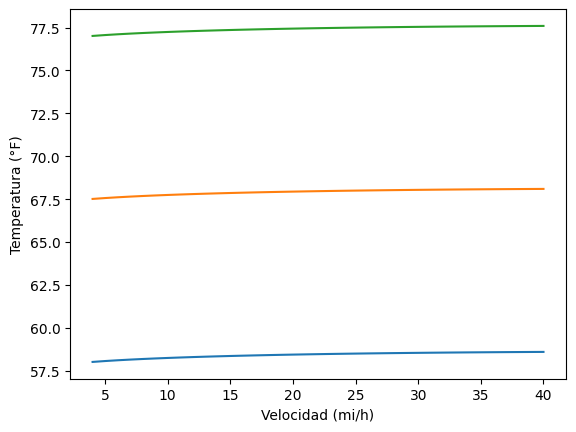

PyObject Text(24.000000000000007, 0.5, 'Temperatura (°F)')

In [7]:
plot(Velocidades, Temp_F_20)
plot(Velocidades, Temp_F_40)
plot(Velocidades, Temp_F_60)
xlabel("Velocidad (mi/h)")
ylabel("Temperatura (°F)")

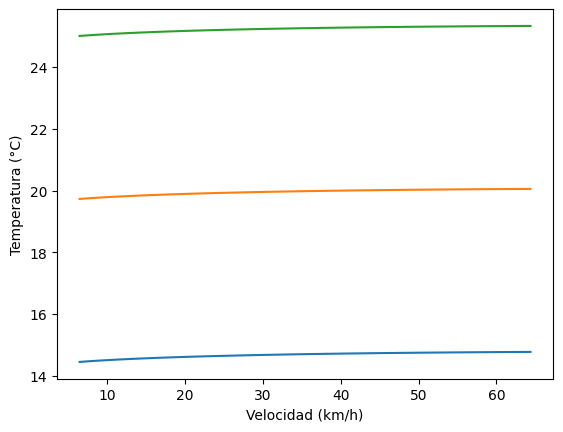

PyObject Text(24.000000000000007, 0.5, 'Temperatura (°C)')

In [8]:
plot(mi_to_km(Velocidades), F_to_C.(Temp_F_20))
plot(mi_to_km(Velocidades), F_to_C.(Temp_F_40))
plot(mi_to_km(Velocidades), F_to_C.(Temp_F_60))
xlabel("Velocidad (km/h)")
ylabel("Temperatura (°C)")

#### Problema 2

La solución de la expresión: 
$$\frac{\partial{T}}{\partial t} = \frac{\partial ^2 T}{\partial x^2}$$
Considerando la condicion inicial $T(x,0)=1$ y las condiciones de frontera $T(0,t)=0$ y $T(1,t)=0$, la temperatura está dada por la serie de Fourier: 
$$T(x,t)= \displaystyle\sum_{k=1}^{\infty} \frac{4}{(2k-1)\pi}\sin{[(2k-1)\pi x]}\exp{[-(2k-1)^2\pi^2 t]}$$
Escriba un código que permita calcular las temperaturas para x = 0.1, 0.25, 0.5, 0.75 y 0.9. Considere 100 
formas diferentes de la transformada (k=1→100). Considere un minuto de operación con t en segundos 
y grafique los resultados de T con tiempos t=1→60


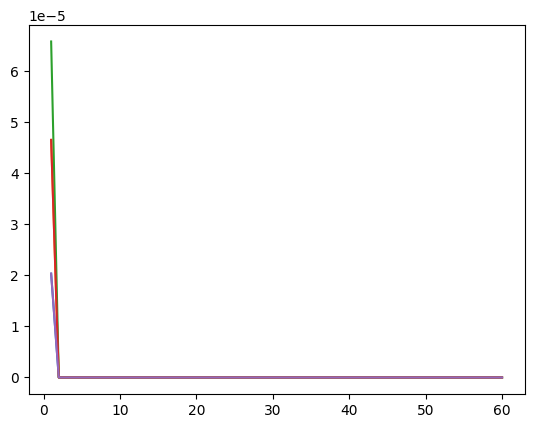

In [9]:
x_list = [0.1, 0.25, 0.5, 0.75, 0.9]
t_list = collect(1:60) #Crea un vector de 1 a 60 
k_list = collect(1:100)

function Temperatura(x_list, t_list, k_list)
    Temp_total = []
    for x in x_list
        Temp_xi = []
        for t in t_list
            Suma_k = 0
            for k in k_list
                T = (4 / ((2 * k - 1) * π)) * sin((2 * k - 1) * π * x) * exp(-(2 * k - 1)^2 * π^2 * t)
                Suma_k = Suma_k + T
            end
            append!(Temp_xi, Suma_k)
        end 
        append!(Temp_total, [Temp_xi])
    end
    for i=1:5
    plot(t_list, Temp_total[i]) 
    end   
end

Temperatura(x_list, t_list,k_list)

#### Problema 3

El sistema de embrague que se muestra en la figura se usa para transmitir par de torsión mediante una 
película de aceite con $\mu$ = 0.38 $N s /m^2$ que está entre dos discos idénticos de 30 cm de diámetro. Cuando 
la flecha impulsora gira a una velocidad de 1 450 rpm, se observa que la flecha impulsada gira a 1 398 
rpm. Suponiendo un perfil lineal de velocidad para la película de aceite, determine el par de torsión 
transmitido.

![prueba](\imagenes\P3.png)

Investigue el efecto del espesor de la película de aceite en el par de torsión transmitido. Haga 
que el espesor de la película varíe desde 0.1 mm hasta 10 mm. Trace la gráfica de los resultados que 
obtenga y exprese sus conclusiones.

##### Solución

$$T = \frac{2\pi^2\mu(n_1-n_2)D^4}{32l}$$
$$T [=] (\frac{N\cdot s}{m^2})(\frac{m^4}{min\cdot m})(\frac{min}{s}) [=] N\cdot m$$



In [10]:
mu = 0.38 # Viscosidad del aceite, Ns/m
D = 30/100 # m
L = 30/100 # m
n1 = 1450 #rpm
n2 = 1398 # rpm
l = (3/1000) # Espesor de la pelicula de aceite, m

T = (2*π^2*mu*(n1-n2)*D^4)/((32*l)*60)
println("El torque ejercido es de: ", T, " N*m")

El torque ejercido es de: 0.548503264590541 N*m


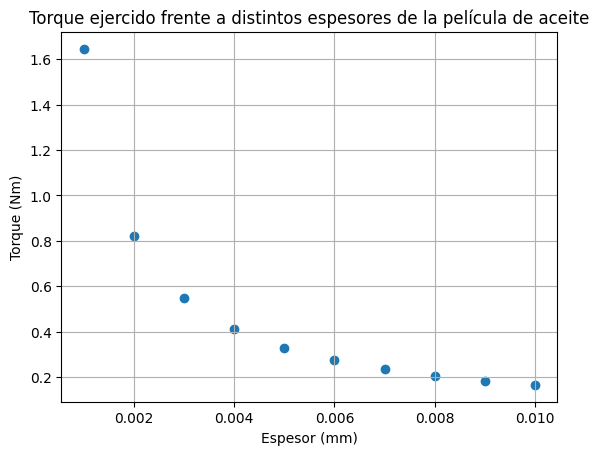

In [11]:
espesor = collect(0.001:0.001:0.01)
Ti = []
for i in espesor
    T = (2*π^2*mu*(n1-n2)*D^4)/((32*i)*60)
    append!(Ti, T)
end
scatter(espesor, Ti)
title("Torque ejercido frente a distintos espesores de la película de aceite")
xlabel("Espesor (mm)")
ylabel("Torque (Nm)")
grid("True")

###### Conclusión

Conforme aumenta la distancia entre las placas de disco, el torque disminuye. Es decir, para aumentar el torque trasmitido es necesario minimizar la distancia que hay entre ellas. Incorporar un aceite de mayor viscosidad puede mejorar más aun estos valores. 

#### Problema 4

La variación de la viscosidad dinámica del agua con la temperatura absoluta se da como:

![Tabla](\Imagenes\P4.png)

Con los datos de la tabla desarrolle una relación para la viscosidad en la forma de $\mu = \mu (T) = A + BT + CT^2 + DT^3 + ET^4$. Use la relación desarrollada, prediga las viscosidades dinámicas del agua a 50 °C, a la cuál el valor reportado en la literatura es de $5.368 \times 10^{-4} Pa\cdot s$. Compare su resultado cpn los de la ecuación de Andrade, la cuál se da en la forma de $\mu = D\cdot e^{B/T}$, donde D y B son constantes cuyos valores se deben determinar usando los datos de la viscosidad



#### Problema 5

Entra vapor estacionariamente a una turbina a 7 MPa y 600 °C con una velocidad de 60 m/s, y sale a 25 
kPa con una calidad de 95 %. Durante el proceso ocurre una pérdida de calor de 20 kJ/kg. El área de 
entrada de la turbina es de 150 cm2, y el área de salida es de 1 400 cm2. Determine el flujo másico del 
vapor, la velocidad de salida y la potencia desarrollada. Utilice Julia para investigar los efectos del área 
de salida de la turbina y la presión de salida de la turbina en la velocidad de la salida y la producción de 
potencia de la turbina. Suponga que la presión de salida varía de 10 a 50 kPa (con la misma calidad), y el 
área de salida varía de 1 000 a 3 000 $cm^2$. Grafique la velocidad de salida y la potencia desarrollada contra 
la presión de salida para las áreas de salida de 1 000, 2 000 y 3 000 $cm^2$, y explique los resultados.

#### Problema 6

Una mezcla líquido-vapor de etilbenceno y tolueno tiene una presión parcial de 250 mm Hg de 
etilbenceno y 343 mm Hg de tolueno. Escriba un código que calcule la composición de la mezcla 
(fracciones molares líquidas y gaseosas) y la temperatura de la mezcla considerando un comportamiento 
ideal. La presión de saturación se puede aproximar utilizando la ecuación de Antoine, en mm Hg y 
Celsius:
$$\log_{10}P^{sat}=A-\frac{B}{T+C}$$
Utilizando los párametros de la siguiente tabla: 

![Tabla6](\Imagenes\P6.png)

##### Solución

$$P^{sat} = 10^{A-\frac{B}{T+C}}$$
$$P^{sat}_T = P^{sat}_A+P^{sat}_B$$

In [12]:
Etilbenceno_const = [6.96719, 1424.255, 213.21]
Tolueno_const = [6.95465, 1334.8, 219.48]

3-element Vector{Float64}:
    6.95465
 1334.8
  219.48

#### Problema 7

En un proceso el vapor de agua ($H_2O$) se calienta a temperaturas lo suficientemente altas para que una 
porción significativa del agua se disocie, o se rompa, para formar oxígeno ($O_2$) e hidrógeno ($H_2$):
$$H_2O \leftrightharpoons H_2 + \frac{1}{2} O_2$$
Si se supone que ésta es la única reacción que se lleva a cabo, la fracción molar x de H2O que se disocia 
se representa por:
$$K = \frac{x}{1-x}\sqrt{\frac{2p_t}{2+x}}$$
donde $K$ es la constante de equilibrio de la reacción y $p_t$ es la presión total de la mezcla. Si $p_t$ = 3 atm y $K$ = 0.05, determine el valor de $x$ que satisfaga la ecuación


In [13]:
#Punto fijo

#### Problema 8

La ecuación de Van der Waals para un gas real utilizando P en atm, volumen en litros y T en K es expresada de la siguiente manera:
$$P=\frac{nRT}{V-nb}-\frac{n^2a}{V^2}$$
donde $n$ es el número de moles.
Considere que tiene 1.5 moles de nitrógeno (a = 1.39 MPa $L^2/mol^2$ y b = 0.03913 L/mol) confinados en 
un recipiente a presión, el cual se encuentra a 13.5 atm. Determine el volumen del recipiente.

In [14]:
#Punto fijo

Problema 3

La brecha entre los dos discos se puede modelar como dos placas paralelas de área $A$ separadas por un fluido con espesor $l$ y viscosidad $\mu$. La fuerza necesaria para mover una de las placas a una velocidad constante $V$ al mismo tiempo que la placa inferior permanece en reposo es:
$$F = \mu A\cdot\frac{V}{l}$$
El par de torsión (torque), donde $R$ es el radio del cilindro interior $$T = FR$$
$$T = \mu A\cdot\frac{V}{l}\cdot R$$
dado que la velocidad $V$ se puede expresar en terminos del radio por la velocidad angular $$V = \omega R$$ y esta ultima en terminos de $2\pi$ rad por la cantidad de vueltas dadas cada minuto 
$$\omega = 2\pi n$$ 
tenemos que: 
$$T = \mu \frac{4\pi^2R^3Ln}{l}$$

Análisis dimensional
$$T [=] (\frac{Ns}{m^2})(\frac{m^3 \cdot m}{m\cdot min})(\frac{1 min}{60 s}) [=] N\cdot m$$

#### Problema 21

##### Solución

In [15]:
T = [595 623 761 849 989 1076 1146 1202 1382 1445 1562] # K
k = [2.12 3.12 14.4 30.6 80.3 131 186 240 489 604 868] # *10^20

1×11 Matrix{Float64}:
 2.12  3.12  14.4  30.6  80.3  131.0  186.0  240.0  489.0  604.0  868.0